<a href="https://colab.research.google.com/github/shashwatshukla123/class-113/blob/main/class_113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import random
import plotly.express as px
import plotly.figure_factory as ff
import statistics
import csv
import pandas as pd
import plotly.graph_objects as go
import numpy as np

In [6]:
df=pd.read_csv('savings_data_final.csv')
fig=px.scatter(df,y="quant_saved",color="rem_any")
fig.show()

In [7]:
with open ("savings_data_final.csv",newline="") as f:
  reader=csv.reader(f)
  savings_data=list(reader)

savings_data.pop(0)
# Finding total number of people and number of people who were reminded.
total_entries=len(savings_data)
total_people_given_reminder=0
for data in savings_data:
  if int(data[3])==1:
    total_people_given_reminder+=1

fig=go.Figure(go.Bar(x=["Reminded","Not Reminded"],y=[total_people_given_reminder,(total_entries-total_people_given_reminder)]))
fig.show()

In [8]:
# Mean, Median.Mode of saving data.
all_savings=[]
for data in savings_data:
  all_savings.append(float(data[0]))

print("mean of savings:- ",statistics.mean(all_savings)) 
print("median of savings:- ",statistics.median(all_savings)) 
print("mode of savings:- ",statistics.mode(all_savings)) 


mean of savings:-  85.32780331328739
median of savings:-  39.2724
mode of savings:-  0.0


In [9]:
reminded_savings=[]
not_reminded_savings=[]
for data in savings_data:
  if int(data[3])==1:
    reminded_savings.append(float(data[0]))
  else:
    not_reminded_savings.append(float(data[0]))  

print("People who were reminded to save:--")
print("mean of reminded-savings:- ",statistics.mean(reminded_savings)) 
print("median of reminded-savings:- ",statistics.median(reminded_savings)) 
print("mode of reminded-savings:- ",statistics.mode(reminded_savings)) 
print("-------------------------------------------------------")
print("People who were not-reminded to save:--")
print("mean of not-reminded-savings:- ",statistics.mean(not_reminded_savings)) 
print("median of not-reminded-savings:- ",statistics.median(not_reminded_savings)) 
print("mode of not-reminded-savings:- ",statistics.mode(not_reminded_savings)) 


People who were reminded to save:--
mean of reminded-savings:-  82.56940908263547
median of reminded-savings:-  39.2724
mode of reminded-savings:-  0.0
-------------------------------------------------------
People who were not-reminded to save:--
mean of not-reminded-savings:-  89.67095185226523
median of not-reminded-savings:-  36.0475
mode of not-reminded-savings:-  0.0


In [10]:
# Find the standard deviation 
print("standard deviation of all saving:--",statistics.stdev(all_savings))
print("standard deviation of reminded-savings:-- ",statistics.stdev(reminded_savings))
print("standard deviation of not-reminded-savings:-- ",statistics.stdev(not_reminded_savings))


standard deviation of all saving:-- 196.75453011909315
standard deviation of reminded-savings:--  173.24866414440817
standard deviation of not-reminded-savings:--  228.875050299707


In [14]:
# Finding co-relation 
# no-one can save at age of 0 so,exclude 0. 
import numpy as np
age=[]
savings=[]
for data in savings_data:
  if float(data[5])!=0:
    age.append(float(data[5]))
    savings.append(float(data[0]))
corelation=np.corrcoef(age,savings)

print(f"Correlation between the age of the person and their savings is - {corelation[0,1]}")


Correlation between the age of the person and their savings is - 0.03663447975985462


In [15]:
# Plot the data 
fig=ff.create_distplot([df["quant_saved"].tolist()],["savings"],show_hist=False)
fig.show()

It is not a normal distribution as majority of the data lies under 1000.
There are a very small number of data point under 1000.
The graph is skewed to the left side.
This mean the majority in more in left rather in the center so, to deal with this we have to remove the outliers.
There is a meathod known Iqr(inter_quartile_range)

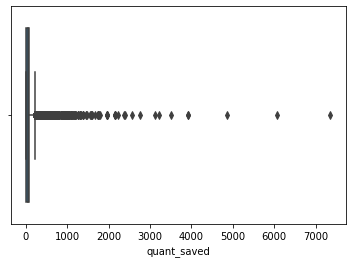

In [16]:
# box plot
import seaborn as sns
sns.boxplot(data=df,x=df["quant_saved"])

In [21]:
# Iqr
q1=df["quant_saved"].quantile(0.25)
q3=df["quant_saved"].quantile(0.75)
Iqr=q3-q1

print(f"Q1 -{q1}")
print(f"Q3 -{q3}")
print("Iqr:-",Iqr)

lower_whisker=q1-1.5*Iqr
upper_whisker=q3+1.5*Iqr
print("lower_whisker",lower_whisker)
print("upper_whisker",upper_whisker)

# creating a new data frame without outliers
new_df=df[df["quant_saved"]<upper_whisker]
print(len(new_df))


Q1 -2.2840000000000003
Q3 -86.514
Iqr:- 84.22999999999999
lower_whisker -124.06099999999998
upper_whisker 212.85899999999998
12378


We can see that any one who saved roughly more than 213 is an outlier data.
Let's find our mean,median,mode of the new_df(data after removing outliers).


In [22]:
#Mean, median and mode of savings
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.866871917288634


Here, now our mean is much more closer to the median unlike before, and the mode still remains to be 0 since there are people in our dataset who haven't saved at all!

\
The standard deviation has also significantly reduced from before, but we still do not have a normal distribution curve.

\
To make this a normal distribution curve now, we can simply draw random samples from the population to create a sampling (normal distribution).

In [35]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

#mean_sampling_reminded = statistics.mean(sampling_mean_list)
#stdev_sampling_reminded = statistics.stdev(sampling_mean_list)
#
#mean_sampling_not_reminded = statistics.mean(sampling_mean_list)
#stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list)

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()


Here, we have a nice bell curve for normal distribution when doing the sampling. Let's also calculate the standard deviation of this normal sampling distribution

In [24]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 5.124446337855915


As expected, this comes out to be roughly 1/10th of the standard deviation of the population.

\
Let's also compare the mean of the population and the sampling -

In [28]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")
print(f"standard deviation of Population - {statistics.stdev(all_savings)}")

Mean of Population - 46.200519389818794
Mean of Sampling Distribution - 46.14784887939517
standard deviation of Population - 50.866871917288634


Awesome, they come out to be exactly the same.

Let's do one final check, by trying to find the correlation between the age and the savings with the new data from which we have removed the outliers!

In [26]:
#temp_df will have the rows where age is not 0
temp_df = new_df[new_df.age != 0]

age = temp_df["age"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(age, savings)
print(f"Correlation between the age of the person and their savings is - {correlation[0,1]}")

Correlation between the age of the person and their savings is - 0.08561544120342093


Now we have the mean of sampling distribution of people who were given reminders and people who were not given reminders. We also have the standard deviation of the people who were not given reminders.

\
Let's see how significantly did reminders impact savings.

In [37]:
#not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (Not Reminded) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (Not Reminded) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not Reminded) -> 88.77177953975641
Standard Deviation of Sampling (Not Reminded) -> 21.935237860017


In [39]:
#reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Reminded) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Reminded) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Reminded) -> 82.57619933934394
Standard Deviation of Sampling (Reminded) -> 17.85176082449327


In [41]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is:- {z_score}")

Z-Score is:- -0.28244873568048295


# Conclusion

\
Given all the analysis that we have done, we saw that there was not much difference between the people who got reminded about saving v/s people who were not reminded of saving.

\
With our Z-Score test, we confirmed that there is not much difference. The Z-Score is around 0.8; it is only when the Z-Score is greater than 2 that we consider the change as significant. Although people who were reminded had a little increase in savings, there's still no significant impact.

\
We also saw that there was no direct correlation between the age of the people and the money that they save.

\
### Next
Given all this, we also have some more data about people attending high school, if they're wealthy and about their gender.

\
1. Do women save more than men?
2. Do wealthy men save more than the poor ones?
3. Do people with higher education save more than those who have not completed high school?

\
Try to find the answers for the following questions and see if you can find anything interesting!